### Random Forest Hands-on 
### Dataset: Customer_churn

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
df= pd.read_csv(r"C:\Users\VIVEK\Downloads\Mohit Bhai\Datasets\customer_churn.csv")

In [71]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [72]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [73]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
type(df['customerID'])

pandas.core.series.Series

In [76]:
df[['customerID']]

,customerID
0,7590-VHVEG
1,5575-GNVDE
2,3668-QPYBK
3,7795-CFOCW
4,9237-HQITU
...,...
7038,6840-RESVB
7039,2234-XADUH
7040,4801-JZAZL
7041,8361-LTMKD


In [77]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [78]:
df.shape

(7043, 21)

In [79]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [80]:
df.customerID.nunique()

7043

In [81]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [82]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors='coerce')

In [83]:
df['TotalCharges'].dtype

dtype('float64')

In [84]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [85]:
df.dropna(inplace=True)

In [86]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [87]:
df.drop(columns=['customerID'], axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
df.shape

(7032, 20)

In [89]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

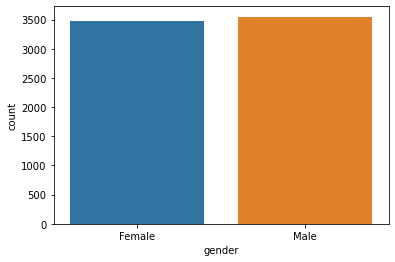

In [90]:
sns.countplot(x='gender', data=df)

In [91]:
df['gender']= df['gender'].map({'Male':1, 'Female':0})
# We can also do pd.get_dummies(df['gender'], drop_first=True)  # To convert Male=1 & Female=0
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
df['Partner']= df['Partner'].map({'Yes':1,'No':0})
df['Dependents']= df['Dependents'].map({'Yes':1,'No':0})
#  or    df['Dependents']= pd.get_dummies(df['Dependents'], drop_first=True)
df['PhoneService']= df['PhoneService'].map({'Yes':1,'No':0})
df['MultipleLines']= df['MultipleLines'].map({'No Phone service':0, 'No':1, 'Yes':2})
df['InternetService']= df['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
df['OnlineSecurity']= df['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
df['OnlineBackup']= df['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
df['DeviceProtection']= df['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
df['TechSupport']= df['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
df['StreamingTV']= df['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
df['StreamingMovies']= df['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
df['Contract']= df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
df['PaperlessBilling']= df['PaperlessBilling'].map({'Yes':1, 'No':0})
df['PaymentMethod']= df['PaymentMethod'].map({'Electronic check':1,'Mailes check':0,'Bank transfer (automatic)':2,'Credit card (automatic)':3})


In [93]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,NaN,0,0,1,0,0,0,0,0,1,1.0,29.85,29.85,No
1,1,0,0,0,34,1,1.0,0,1,0,1,0,0,0,1,0,NaN,56.95,1889.50,No
2,1,0,0,0,2,1,1.0,0,1,1,0,0,0,0,0,1,NaN,53.85,108.15,Yes
3,1,0,0,0,45,0,NaN,0,1,0,1,1,0,0,1,0,2.0,42.30,1840.75,No
4,0,0,0,0,2,1,1.0,1,0,0,0,0,0,0,0,1,1.0,70.70,151.65,Yes


In [94]:
df['PaymentMethod'].isna().sum()

1604

In [95]:
df.isna().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        680
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod       1604
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [96]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines       float64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [97]:
df['Churn']= df['Churn'].map({'Yes':1,'No':0})
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines       float64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [98]:
df.dropna(inplace=True)

In [99]:
x= df.iloc[:,:-1].values  # Independent data
y=df.iloc[:,-1].values    # Target data

In [100]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
classifier= RandomForestClassifier(n_estimators=500)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [102]:
y_pred= classifier.predict(x_test)

In [103]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [104]:
y_pred.shape

(982,)

In [105]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
y_test.shape

(982,)

In [107]:
print('Confusion Matrix:')
c1= confusion_matrix(y_test,y_pred)
print(c1)

Confusion Matrix:
[[630  71]
 [125 156]]


In [108]:
a1= accuracy_score(y_test,y_pred)
print('Accuracy Score:',round(a1*100,2),'%')

Accuracy Score: 80.04 %


In [109]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       701
           1       0.69      0.56      0.61       281

    accuracy                           0.80       982
   macro avg       0.76      0.73      0.74       982
weighted avg       0.79      0.80      0.79       982



In [110]:
# Sensitivity: the ability of a test to correctly identify the churned out customers.
# Sen= TP/TP+Fn

In [111]:
# Specificity: the ability of a test to correctly identify people who have not churned out.
# Speci= TN/TN+FP

In [112]:
from sklearn.datasets import make_classification

In [113]:
importance= classifier.feature_importances_
importance

array([0.02764108, 0.02107876, 0.02387725, 0.02038922, 0.17232   ,
       0.        , 0.02126913, 0.02422004, 0.03986688, 0.02801216,
       0.0254136 , 0.03525429, 0.02095894, 0.02050196, 0.08325849,
       0.02504964, 0.05311879, 0.17769747, 0.1800723 ])

In [114]:
importance = pd.DataFrame(importance)
importance

,0
0,0.027641
1,0.021079
2,0.023877
3,0.020389
4,0.172320
5,0.000000
6,0.021269
7,0.024220
8,0.039867
9,0.028012


In [115]:
df1= pd.DataFrame(columns=['Feature','Importance'])
df1

,Feature,Importance


In [116]:
col_list=list(df.columns)
col_list
col_list.pop(-1)
col_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [117]:
df1

,Feature,Importance


In [118]:
df1['Feature']= col_list
df1

,Feature,Importance
0,gender,NaN
1,SeniorCitizen,NaN
2,Partner,NaN
3,Dependents,NaN
4,tenure,NaN
5,PhoneService,NaN
6,MultipleLines,NaN
7,InternetService,NaN
8,OnlineSecurity,NaN
9,OnlineBackup,NaN


In [119]:
df1['Importance']= importance

In [120]:
df1

,Feature,Importance
0,gender,0.027641
1,SeniorCitizen,0.021079
2,Partner,0.023877
3,Dependents,0.020389
4,tenure,0.172320
5,PhoneService,0.000000
6,MultipleLines,0.021269
7,InternetService,0.024220
8,OnlineSecurity,0.039867
9,OnlineBackup,0.028012


In [121]:
df1.sort_values(by='Importance', ascending=False)

,Feature,Importance
18,TotalCharges,0.180072
17,MonthlyCharges,0.177697
4,tenure,0.172320
14,Contract,0.083258
16,PaymentMethod,0.053119
8,OnlineSecurity,0.039867
11,TechSupport,0.035254
9,OnlineBackup,0.028012
0,gender,0.027641
10,DeviceProtection,0.025414


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

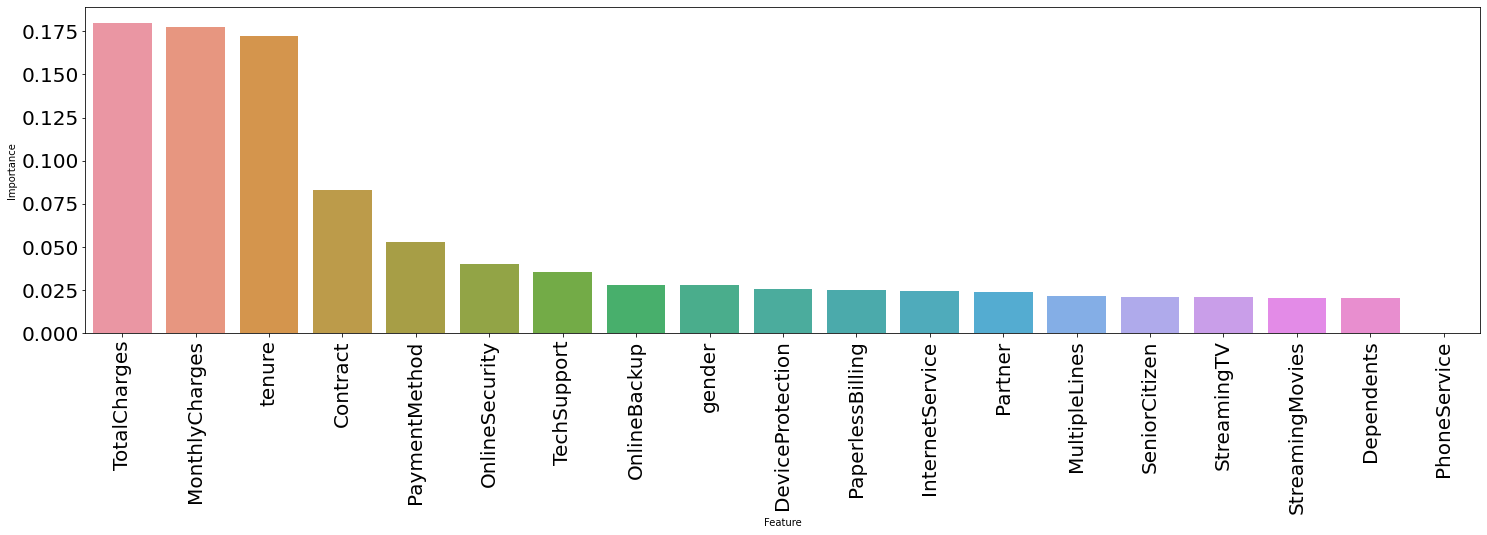

In [123]:
plt.figure(figsize=(25,6))
# Draw barplot and sort bars
sns.barplot(x='Feature',y='Importance',data=df1, order=df1.sort_values('Importance', ascending=False).Feature)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [124]:
     #END#